<a href="https://colab.research.google.com/github/anand-bits/DecisionTree-Regression-with-Random-Forest-on-Boston-Dataset/blob/main/Decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv('/content/housing.csv', header=None, delimiter=r"\s+", names=column_names)
data.head()
data.shape

(506, 14)

In [ ]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
##selecting the target
x= data.drop(['MEDV'],axis=1)

x.shape

(506, 13)

In [ ]:
y=data['MEDV']
y.shape


(506,)

In [ ]:
from sklearn.preprocessing import StandardScaler

sc_x=StandardScaler()
x=sc_x.fit_transform(x)
x.shape
x

array([[-0.41978194,  0.28482986, -1.2879095 , ..., -1.45900038,
         0.44105193, -1.0755623 ],
       [-0.41733926, -0.48772236, -0.59338101, ..., -0.30309415,
         0.44105193, -0.49243937],
       [-0.41734159, -0.48772236, -0.59338101, ..., -0.30309415,
         0.39642699, -1.2087274 ],
       ...,
       [-0.41344658, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.98304761],
       [-0.40776407, -0.48772236,  0.11573841, ...,  1.17646583,
         0.4032249 , -0.86530163],
       [-0.41500016, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.66905833]])

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=30)
x_train.shape
y_train.shape

(354,)

**Decision tree regression**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)


DecisionTreeRegressor()

In [ ]:
y_predict=dtr.predict(x_test)
y_predict[:10]

array([18.2,  8.3, 20.4, 30.1, 13.1, 18.2, 21. , 43.5, 14.5, 25. ])

In [ ]:
y_test[:10]

21     19.6
440    10.5
103    19.3
178    29.9
22     15.2
31     14.5
286    20.1
282    46.0
424    11.7
100    27.5
Name: MEDV, dtype: float64

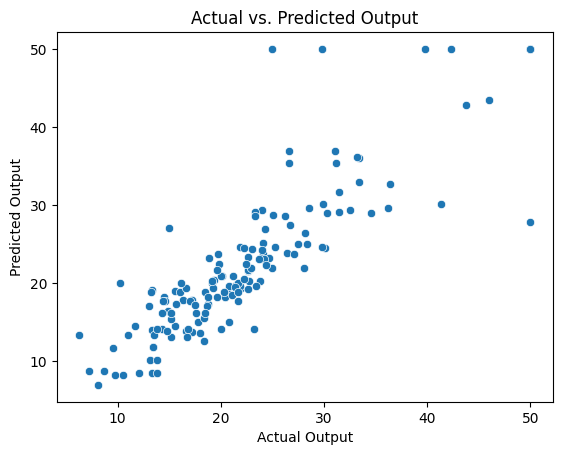

In [ ]:
import seaborn as sns

# Assuming predicted_output and actual_output are numpy arrays or lists

sns.scatterplot(x=y_test, y=y_predict)
plt.xlabel('Actual Output')
plt.ylabel('Predicted Output')
plt.title('Actual vs. Predicted Output')
plt.show()


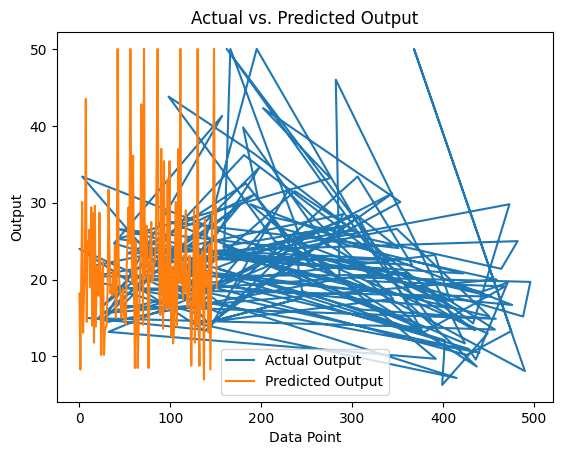

In [ ]:
import matplotlib.pyplot as plt

# Assuming predicted_output and actual_output are numpy arrays or lists

plt.plot(y_test, label='Actual Output')
plt.plot(y_predict, label='Predicted Output')
plt.xlabel('Data Point')
plt.ylabel('Output')
plt.title('Actual vs. Predicted Output')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_predict)

23.035592105263156

# **Random forest**


In [51]:

from sklearn.ensemble import RandomForestRegressor
rf_c=RandomForestRegressor(n_estimators=500)
rf_c.fit(x_train,y_train)

RandomForestRegressor(n_estimators=500)

In [52]:
y_pred=rf_c.predict(x_test)


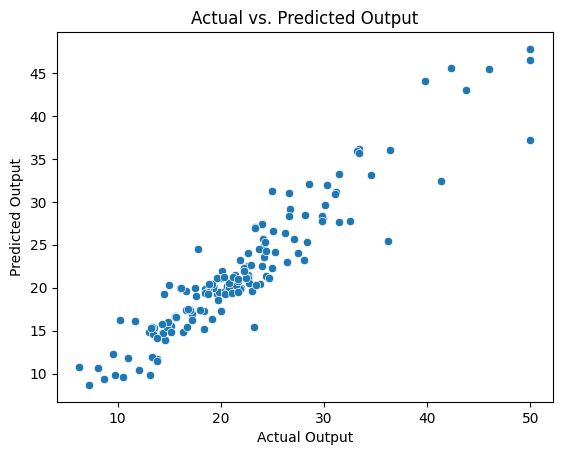

In [53]:
import seaborn as sns

# Assuming predicted_output and actual_output are numpy arrays or lists

sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Output')
plt.ylabel('Predicted Output')
plt.title('Actual vs. Predicted Output')
plt.show()


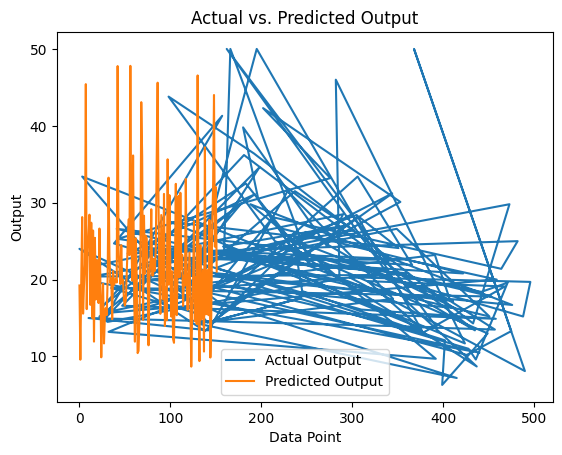

In [54]:

plt.plot(y_test, label='Actual Output')
plt.plot(y_pred, label='Predicted Output')
plt.xlabel('Data Point')
plt.ylabel('Output')
plt.title('Actual vs. Predicted Output')
plt.legend()
plt.show()

In [55]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

7.7302666476315975